In [13]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [14]:
#data=pd.read_csv('PartAdata.csv')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [15]:
data = pd.read_csv('PartAdata.csv')
print(data.shape)
data.head()

(18964, 51)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [16]:
#data cleaning
data.GS.fillna(data.GS.mean(),inplace=True) 
data.PTS.fillna(data.PTS.mean(),inplace=True) 
data.PER.fillna(data.PER.mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 
data['2P%'].fillna(data['2P%'].mean(),inplace=True) 
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['TS%'].fillna(data['TS%'].mean(),inplace=True) 
data['PER']=data['PER'].replace([129.100000], np.nan)
data['PER']=data['PER'].replace([-90.600000], np.nan)
data.PER.fillna(data.PER.mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 
data['2P%'].fillna(data['2P%'].mean(),inplace=True) 
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['TS%']=data['TS%'].replace(data['TS%'][data['TS%']>1], data['TS%'][data['TS%']].mean())

            Unnamed: 0      Year       Age         G        GS        MP  \
Unnamed: 0    1.000000  0.997013  0.012594 -0.099754 -0.045313 -0.078217   
Year          0.997013  1.000000  0.020290 -0.102183 -0.045099 -0.079250   
Age           0.012594  0.020290  1.000000  0.017809  0.038328  0.036514   
G            -0.099754 -0.102183  0.017809  1.000000  0.625899  0.862103   
GS           -0.045313 -0.045099  0.038328  0.625899  1.000000  0.857297   
MP           -0.078217 -0.079250  0.036514  0.862103  0.857297  1.000000   
PER           0.001879  0.001149 -0.005637  0.416450  0.433649  0.510954   
TS%           0.016460  0.013098  0.029861  0.380112  0.290703  0.377151   
3PAr          0.412911  0.414646  0.072755 -0.021688 -0.053690 -0.002922   
FTr          -0.087539 -0.084863 -0.063599 -0.049441 -0.005194 -0.025737   
ORB%         -0.107571 -0.105384 -0.075995 -0.036893 -0.028155 -0.074469   
DRB%          0.095090  0.094332  0.020206  0.054535  0.105493  0.059645   
TRB%        

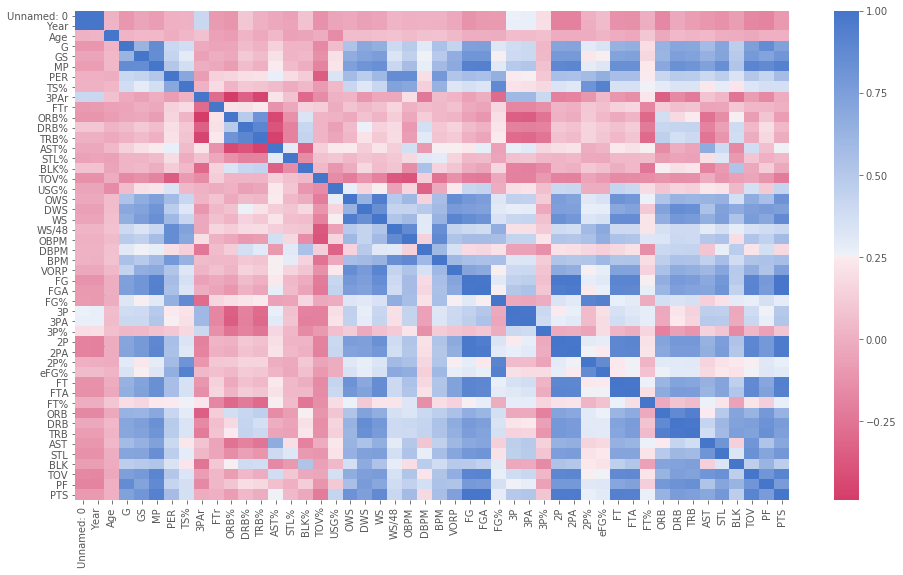

In [17]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data.corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [18]:
range(1,2+1)
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
dist.rvs()
a=np.append(np.array(1),dist.rvs())
a
print (random.random())

0.6993518540196331


In [19]:
data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,23.593375,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,23.593375,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,23.593375,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.000000,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,23.593375,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [20]:
data=data.drop(['Player','Tm','Pos'],axis=1)
data.head()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,32.0,82.0,23.593375,3143.0,25.3,0.639,0.001,0.344,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,25.0,67.0,23.593375,1222.0,11.0,0.511,0.003,0.258,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,25.0,75.0,23.593375,2168.0,19.2,0.571,0.002,0.270,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,31.0,80.0,80.000000,2864.0,15.3,0.574,0.023,0.548,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,31.0,26.0,23.593375,560.0,7.4,0.524,0.000,0.833,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [30]:
data.isnull().sum()

Unnamed: 0      0
Year            0
Age            37
G              37
GS              0
MP             37
PER             0
TS%             0
3PAr          125
FTr           125
ORB%           42
DRB%           42
TRB%           42
AST%           42
STL%           42
BLK%           42
TOV%           98
USG%           42
OWS            37
DWS            37
WS             37
WS/48          42
OBPM           37
DBPM           37
BPM            37
VORP           37
FG             37
FGA            37
FG%           125
3P             37
3PA            37
3P%             0
2P             37
2PA            37
2P%             0
eFG%          125
FT             37
FTA            37
FT%             0
ORB            37
DRB            37
TRB            37
AST            37
STL            37
BLK            37
TOV            37
PF             37
PTS             0
dtype: int64

In [31]:
data.fillna(data.mean(),inplace=True) 

In [32]:
data.isnull().sum()

Unnamed: 0    0
Year          0
Age           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

In [33]:
def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [36]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

Counter({0: 6945, 3: 6639, 1: 4004, 4: 1137, 2: 239})


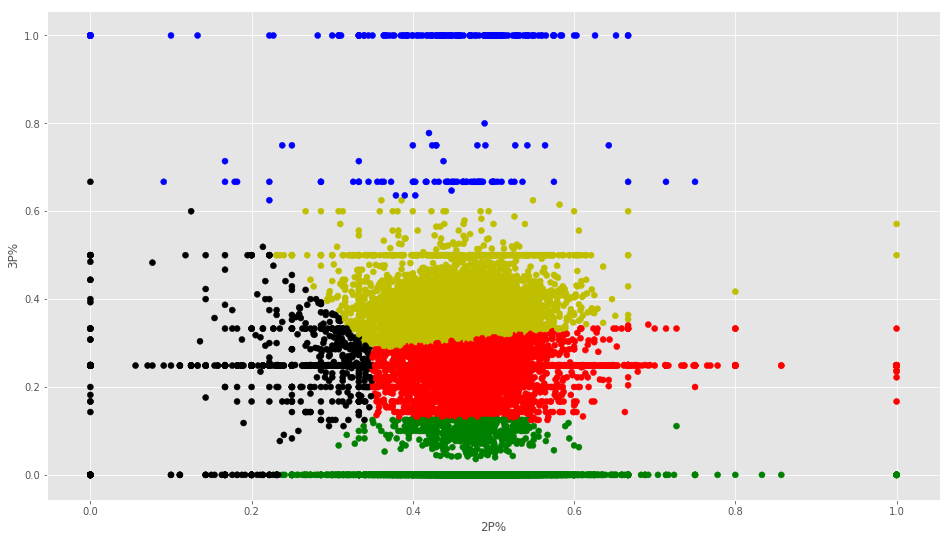

In [51]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=5)
X = data[["2P%", "3P%"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data["2P%"], data["3P%"], c=colors)
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.show()

Counter({0: 18964})


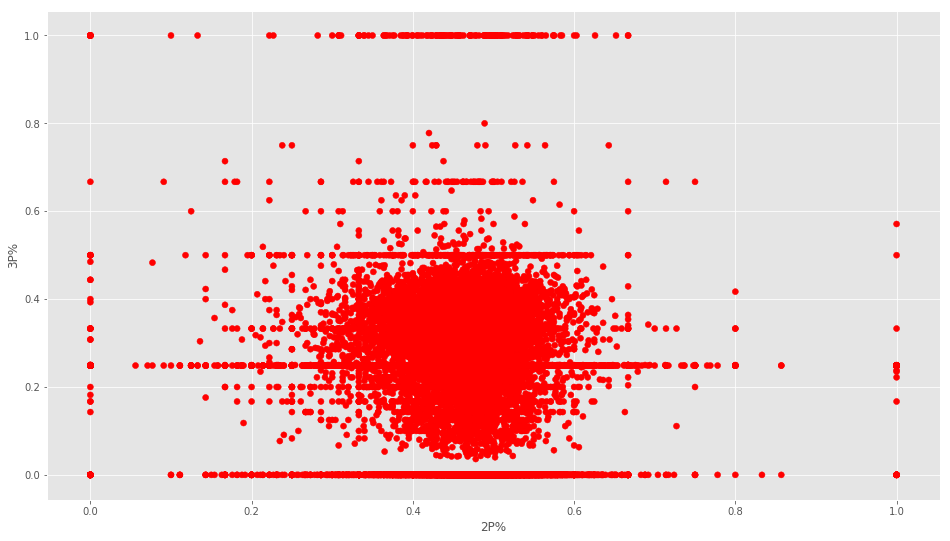

In [55]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = data[["2P%", "3P%"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data["2P%"], data["3P%"], c=colors)
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.show()

Counter({2: 10552, 0: 4227, 1: 3580, 3: 605})


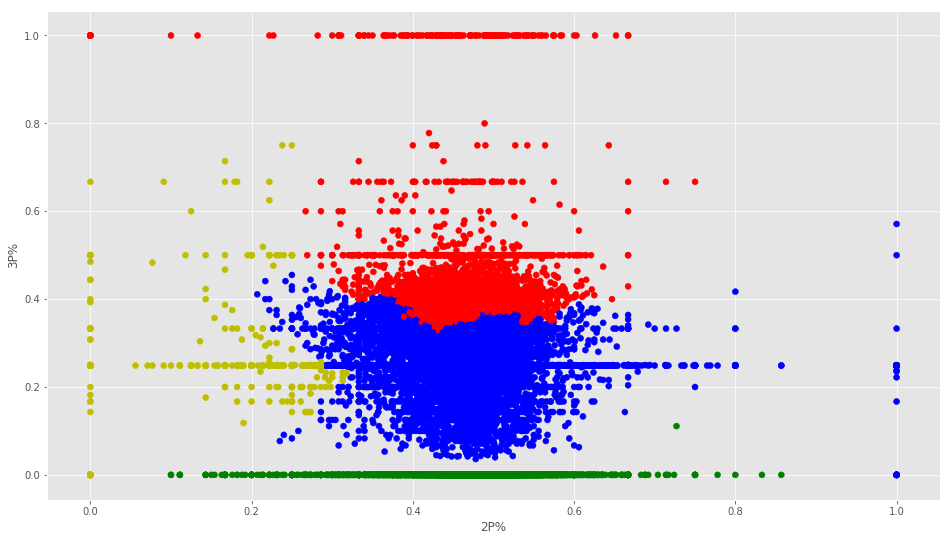

In [57]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = data[["2P%", "3P%"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data["2P%"], data["3P%"], c=colors)
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.show()

In [28]:
def random_clusters(c=2,n=333,m=0.0, cv=1.0):
    data = []
    m=m-5.0 
    cv=cv-1.0     
    flip=True
    for i in range(1,c+1):
      m=m+5.0
      me=m   
      if flip:
        me=-1.0*me
      flip = not flip        
      cv=cv+1.0    
      if random.random() < 0.7:   
        dist = multivariate_normal(mean=[m,me], cov=[[cv,(random.random()*cv)],[(random.random()*cv),cv]])
      elif random.random() < 0.3:   
        dist = multivariate_normal(mean=[me,m], cov=[[cv,0.0],[0.0,cv]])
      else:   
        dist = multivariate_normal(mean=[m,m])
      for j in range(n):
        data.append(np.append(np.array(i),dist.rvs()))   
    df = pd.DataFrame(data, columns=["d","x","y"]) 
    df[['d']] = df[['d']].astype(int)
    return df

In [29]:
def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

/anaconda3/lib/python3.5/site-packages/scipy/stats/_multivariate.py:651: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


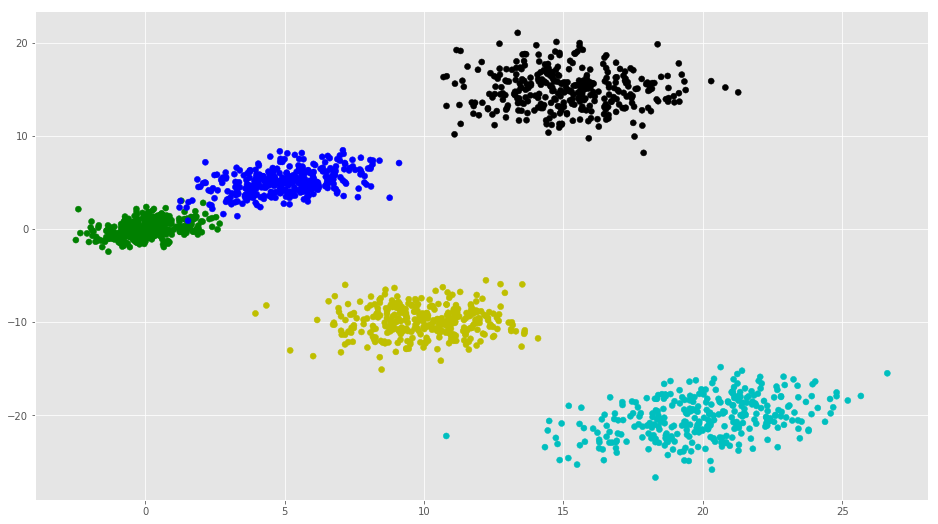

In [49]:
rc=random_clusters(c=5)
rc.head()
col = num_to_colors(rc['d'])
plt.scatter(rc['x'], rc['y'],c=col)
plt.show()

In [42]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='g')
df_circ = pd.concat([df1, df2])

In [43]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

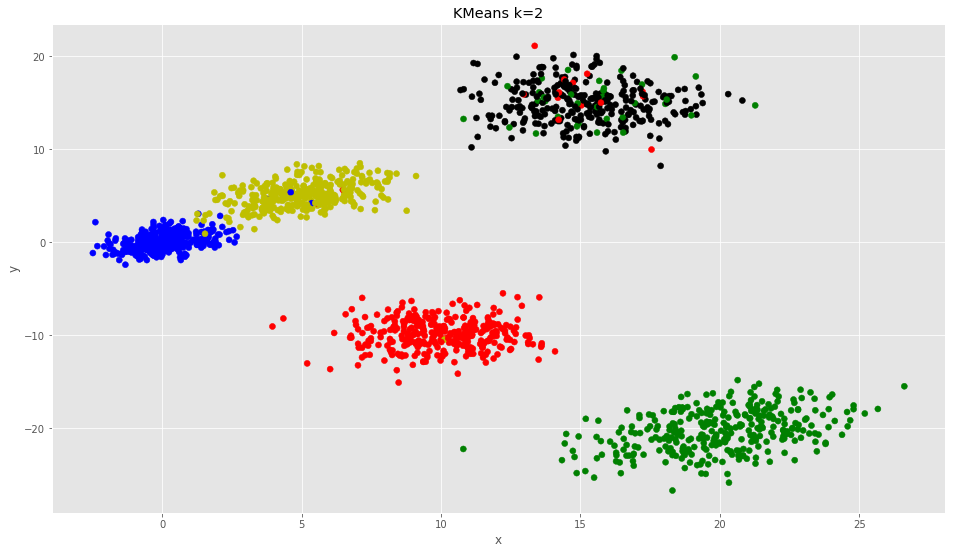

In [50]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

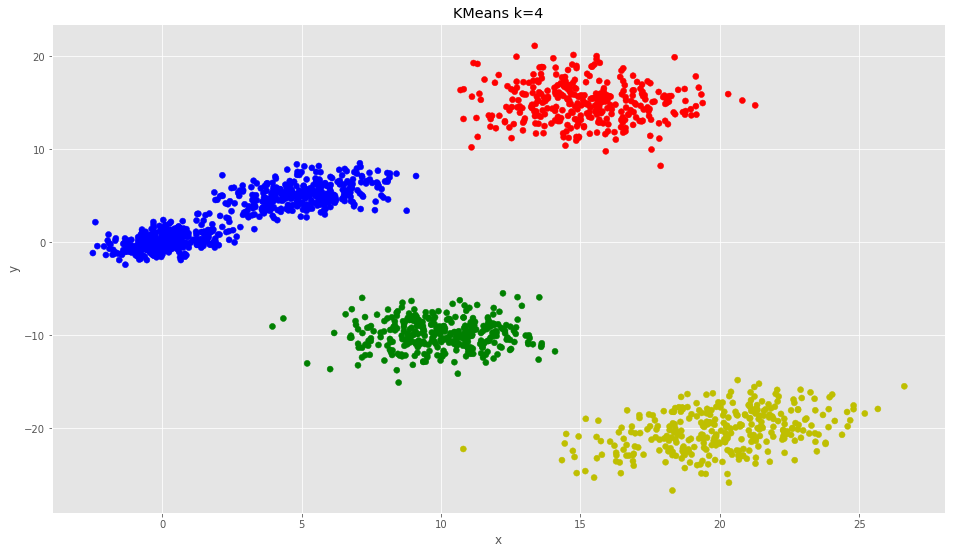

In [51]:
estimator = KMeans(n_clusters=4)
X = rc[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(rc['x'], rc['y'], c=colors)
plt.title("KMeans k=4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [65]:
#计算欧几里得距离,a,b分别为两个元组
def dist(a, b):
    return math.sqrt(math.pow(int(a[0])-int(b[0]), 2)+math.pow(int(a[1])-int(b[1]), 2))

#算法模型
def DBSCAN(D, e, Minpts):
    #初始化核心对象集合T,聚类个数k,聚类集合C, 未访问集合P,
    T = set(); k = 0; C = []; P = set(D)
    for d in D:
        if len([ i for i in D if dist(d, i) <= e]) >= Minpts:
            T.add(d)
    #开始聚类
    while len(T):
        P_old = P
        o = list(T)[np.random.randint(0, len(T))]
        P = P - set(o)
        Q = []; Q.append(o)
        while len(Q):
            q = Q[0]
            Nq = [i for i in D if dist(q, i) <= e]
            if len(Nq) >= Minpts:
                S = P & set(Nq)
                Q += (list(S))
                P = P - S
            Q.remove(q)
        k += 1
        Ck = list(P_old - P)
        T = T - set(Ck)
        C.append(Ck)
    return C

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper right')
    pl.show()




C = DBSCAN(data, 0.11, 5)
draw(C)

ValueError: could not convert string to float: 'U'

In [67]:
data.drop(['Player','TM'])

ValueError: labels ['Player' 'TM'] not contained in axis